## Lexicon data exploratory Analysis

In [1]:
import pandas as pd
import altair as alt

import re
import unicodedata
from collections import Counter 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

import unicodedata

def unicode_filter(string):
    string = string.replace(u' \u200f','')
    string = string.replace(u'\u200f','')
    
    return string

alt.data_transformers.disable_max_rows()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guilherme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DataTransformerRegistry.enable('default')

In [2]:
lexicons = ['Outrage','Vagueness','Argumentation','Modalization',
            'Valuation','Sentiment','Presupposition','Ambiental','rt_auto', 'ra_auto', 'rp_auto',
            'armas_auto', 'racismo_auto']
features = lexicons

In [3]:
df = pd.read_csv('../data/ht_arm_rac_2019-01-01_to_2021-02-22.csv',lineterminator='\n')
# df = df[df.Vagueness > 0.025]
# df = df[df.Outrage > 0.025]
df[features] = (df[features] - df[features].mean()) / df[features].std()
df['username'] = df['username'].apply(unicode_filter)
df['len_tweet'] = df['text'].str.split().apply(len)
df = df.dropna(subset=['Ambiental'])
df#.to_csv("../data/ht_2019-01-01_to_2020-09-07_governo2.csv",index=False)

index                   id  id_parlamentar    casa  \
1              1  1357019439326183424          204379  câmara   
2              2  1357018959879536640          204379  câmara   
3              3  1357017482431778818          204379  câmara   
4              4  1350891698851897344          204379  câmara   
5              5  1340807316577333250          204379  câmara   
...          ...                  ...             ...     ...   
1242399  1242399  1224665701497131008               0       -   
1242400  1242400  1224650603512651777               0       -   
1242401  1242401  1224509010839310338               0       -   
1242402  1242402  1224485366595510273               0       -   
1242403  1242403  1224445226065920005               0       -   

          nome_eleitoral     partido  uf       username  created_at  \
1         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
2         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
3         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
4         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-01-17   
5         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2020-12-20   
...                  ...         ...  ..            ...         ...   
1242399  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242400  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242401  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242402  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242403  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-03   

                                                      text  ...  Valuation  \
1        Estamos na 56° legislatura e pela primeira vez...  ...   1.109234   
2        Saúdo tbm os eleitos para a Mesa, deputados: A...  ...  -1.260798   
3        Parabenizo e desejo sucesso aos novos presiden...  ...  -0.195239   
4        Notícia tanto aguardada: Duas vacinas aprovada...  ...   0.653722   
5        Muitos são os desafios. Imensa é nossa luta pa...  ...   0.608161   
...                                                    ...  ...        ...   
1242399  When Brazilian official agencies use social me...  ...  -1.161977   
1242400  @fiori_anita @petracostal O comentário sexista...  ...  -0.708909   
1242401              @betomiranda @petracostal Exatamente.  ...   0.714047   
1242402                 @juzinhapersonal @petracostal Não.  ...   2.142094   
1242403  Depois dessa vou torcer muito por Democracia e...  ...   0.537326   

         Sentiment  Presupposition  Ambiental   rt_auto   ra_auto   rp_auto  \
1         0.154600        0.932111   0.047014  0.663040  0.500392  0.831275   
2        -0.870140       -2.008348  -1.149309  0.429540  0.947992  0.729624   
3        -1.004945       -0.768929  -0.532733  0.807676  1.478826  1.102921   
4        -0.301798        0.314928   0.793293 -0.178546 -0.306937  0.066632   
5        -0.586694        0.166027   1.363232 -0.068999  0.060989  0.550310   
...            ...             ...        ...       ...       ...       ...   
1242399  -1.356238       -1.712982  -1.450840 -1.985637 -1.905470 -1.420503   
1242400   0.751963       -0.799476  -1.633531 -1.533527 -2.021905 -1.749596   
1242401   1.092393        1.378581  -0.648565 -1.782434 -1.995289 -1.677869   
1242402   1.214427        1.511317  -0.564566 -1.053707 -0.589377 -0.322279   
1242403   0.424693        0.427793  -0.308307 -0.055739 -0.368895  0.001049   

         armas_auto  racismo_auto  len_tweet  
1          0.568895      1.403879         36  
2         -0.482378     -1.551987         37  
3          0.375037     -0.923737         20  
4          0.002258      0.139750         36  
5          0.083735      1.386261         21  
...             ...           ...        ...  
1242399   -1.566262     -1.471327         25  
1242400   -2.006979      1.504078          9  
1242401   -1.803816      1.078224          3  
1242402    0.159593  

In [4]:
temas = []
for _, row in df.iterrows():
    maxi = max([row.Ambiental, row.rt_auto, row.ra_auto, row.rp_auto, row.armas_auto, row.racismo_auto])
#     if maxi> 1.5:
#         print(maxi)
    if maxi < 1.5:
        temas.append(0)
    elif row.Ambiental == maxi:
        temas.append(1)
    elif row.rt_auto == maxi:
        temas.append(2)
    elif row.ra_auto == maxi:
        temas.append(3)
    elif row.rp_auto == maxi:
        temas.append(4)
    elif row.armas_auto == maxi:
        temas.append(5)
    elif row.racismo_auto == maxi:
        temas.append(6)
df["tema"] = temas

In [5]:
rac = df[df.tema == 1]
rac = rac[rac.partido != 'INFLUENCER']
rac = rac.groupby(by=['nome_eleitoral']).count()[['Ambiental']].sort_values(by=['Ambiental'],ascending=False).head(30)
rac

Ambiental
nome_eleitoral                 
NILTO TATTO                2508
JOSÉ GUIMARÃES             1184
ARNALDO JARDIM              996
ÁUREA CAROLINA              774
BACELAR                     762
TEREZA CRISTINA             758
MARGARIDA SALOMÃO           699
VANDER LOUBET               664
PAULO PIMENTA               653
ALCEU MOREIRA               604
CHRISTINO AUREO             598
EDMILSON RODRIGUES          558
JOSÉ MEDEIROS               557
EVAIR VIEIRA DE MELO        554
HELIO LOPES                 529
JAQUES WAGNER               520
FERNANDA MELCHIONNA         519
BOHN GASS                   516
PLÍNIO VALÉRIO              507
ALESSANDRO MOLON            502
BOSCO SARAIVA               502
JEAN PAUL PRATES            499
AIRTON FALEIRO              473
CHICO D'ANGELO              472
PADRE JOÃO                  450
TALÍRIA PETRONE             435
CAMILO CAPIBERIBE           430
SANDRO ALEX                 408
HUMBERTO COSTA              387
FABIANO CONTARATO           384

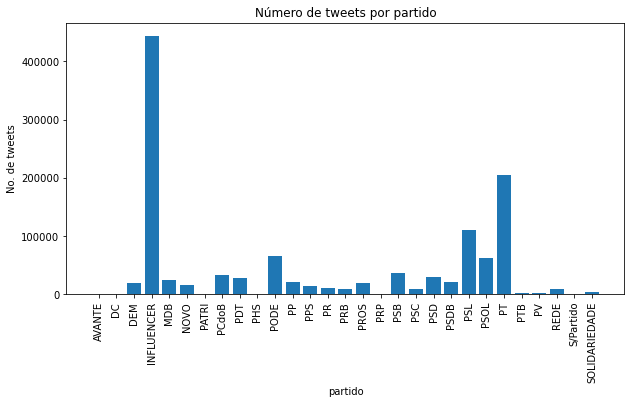

In [6]:
bar = df.groupby(by=['partido']).count()[['index']]
bar_vals = bar.index.values
bar_cols = bar['index'].values


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot

plt.bar(bar_vals, bar_cols)
 
plt.xlabel("partido")
plt.ylabel("No. de tweets")
plt.title("Número de tweets por partido")
plt.xticks(rotation=90)
plt.show()

In [7]:
df#[df.partido == 'INFLUENCER']

index                   id  id_parlamentar    casa  \
1              1  1357019439326183424          204379  câmara   
2              2  1357018959879536640          204379  câmara   
3              3  1357017482431778818          204379  câmara   
4              4  1350891698851897344          204379  câmara   
5              5  1340807316577333250          204379  câmara   
...          ...                  ...             ...     ...   
1242399  1242399  1224665701497131008               0       -   
1242400  1242400  1224650603512651777               0       -   
1242401  1242401  1224509010839310338               0       -   
1242402  1242402  1224485366595510273               0       -   
1242403  1242403  1224445226065920005               0       -   

          nome_eleitoral     partido  uf       username  created_at  \
1         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
2         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
3         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
4         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-01-17   
5         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2020-12-20   
...                  ...         ...  ..            ...         ...   
1242399  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242400  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242401  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242402  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242403  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-03   

                                                      text  ...  Sentiment  \
1        Estamos na 56° legislatura e pela primeira vez...  ...   0.154600   
2        Saúdo tbm os eleitos para a Mesa, deputados: A...  ...  -0.870140   
3        Parabenizo e desejo sucesso aos novos presiden...  ...  -1.004945   
4        Notícia tanto aguardada: Duas vacinas aprovada...  ...  -0.301798   
5        Muitos são os desafios. Imensa é nossa luta pa...  ...  -0.586694   
...                                                    ...  ...        ...   
1242399  When Brazilian official agencies use social me...  ...  -1.356238   
1242400  @fiori_anita @petracostal O comentário sexista...  ...   0.751963   
1242401              @betomiranda @petracostal Exatamente.  ...   1.092393   
1242402                 @juzinhapersonal @petracostal Não.  ...   1.214427   
1242403  Depois dessa vou torcer muito por Democracia e...  ...   0.424693   

         Presupposition  Ambiental   rt_auto   ra_auto   rp_auto  armas_auto  \
1              0.932111   0.047014  0.663040  0.500392  0.831275    0.568895   
2             -2.008348  -1.149309  0.429540  0.947992  0.729624   -0.482378   
3             -0.768929  -0.532733  0.807676  1.478826  1.102921    0.375037   
4              0.314928   0.793293 -0.178546 -0.306937  0.066632    0.002258   
5              0.166027   1.363232 -0.068999  0.060989  0.550310    0.083735   
...                 ...        ...       ...       ...       ...         ...   
1242399       -1.712982  -1.450840 -1.985637 -1.905470 -1.420503   -1.566262   
1242400       -0.799476  -1.633531 -1.533527 -2.021905 -1.749596   -2.006979   
1242401        1.378581  -0.648565 -1.782434 -1.995289 -1.677869   -1.803816   
1242402        1.511317  -0.564566 -1.053707 -0.589377 -0.322279    0.159593   
1242403        0.427793  -0.308307 -0.055739 -0.368895  0.001049   -0.101062   

         racismo_auto  len_tweet  tema  
1            1.403879         36     0  
2           -1.551987         37     0  
3           -0.923737         20     0  
4            0.139750         36     0  
5            1.386261         21     0  
...               ...        ...   ...  
1242399     -1.471327         25     0  
1242400      1.504078          9     6  
1242401      1.078224          3     0  
1242402      2.068747          3     6  
1242403      0.692123       

In [8]:
arm = df[df.tema == 5]
arm = arm.groupby(by=['nome_eleitoral']).count()[['armas_auto']].sort_values(by=['armas_auto'],ascending=False).head(30)
arm

armas_auto
nome_eleitoral                          
Jornal O Globo                      2728
O Antagonista                       2242
Poder360                            1138
Ricardo Noblat                      1006
FERNANDO COLLOR                      779
Claudio Dantas                       673
HELIO LOPES                          599
JOSÉ GUIMARÃES                       426
Pedro Doria                          373
Reinaldo Azevedo                     372
VPR – Movimento Vem pra Rua          371
CARLA ZAMBELLI                       352
JOSÉ MEDEIROS                        346
EDUARDO CURY                         323
George Marques                       296
CORONEL TADEU                        270
Vera Magalhães                       269
MARCELO FREIXO                       268
PAULO PIMENTA                        266
Renato Souza                         264
MAJOR OLIMPIO                        262
Claudio Tognolli                     259
BIA KICIS                            244
HUMBERTO COSTA                       224
Lauro Jardim                         209
MBL – Movimento Brasil Livre         199
MARGARIDA SALOMÃO                    199
ALVARO DIAS                          198
PAULO EDUARDO MARTINS                198
BACELAR                              169

In [9]:
amb = df[df.tema == 1]
amb =amb.groupby(by=['nome_eleitoral']).count()[['Ambiental']].sort_values(by=['Ambiental'],ascending=False).head(30)
amb

Ambiental
nome_eleitoral                 
Jornal O Globo             4370
Poder360                   2803
NILTO TATTO                2508
O Antagonista              2062
Ricardo Noblat             1742
JOSÉ GUIMARÃES             1184
ARNALDO JARDIM              996
ÁUREA CAROLINA              774
BACELAR                     762
TEREZA CRISTINA             758
MARGARIDA SALOMÃO           699
VANDER LOUBET               664
PAULO PIMENTA               653
Claudio Dantas              631
ALCEU MOREIRA               604
The Intercept Brasil        602
CHRISTINO AUREO             598
EDMILSON RODRIGUES          558
JOSÉ MEDEIROS               557
EVAIR VIEIRA DE MELO        554
Lauro Jardim                534
HELIO LOPES                 529
JAQUES WAGNER               520
FERNANDA MELCHIONNA         519
Claudio Tognolli            518
BOHN GASS                   516
PLÍNIO VALÉRIO              507
ALESSANDRO MOLON            502
BOSCO SARAIVA               502
JEAN PAUL PRATES            499

In [10]:
#df.groupby(by=['username']).count().index.to_list()

In [11]:
#df[df.nome_eleitoral == 'EDUARDO BOLSONARO'].sort_values(by=['Governo'],ascending = True).head(40)

In [12]:
# dei_parl = df.groupby(by=['nome_eleitoral','partido']).mean()
# num_tweets_parl = df.groupby(by=['nome_eleitoral']).count().id_parlamentar.to_list()
# dei_parl['num_tweets'] = num_tweets_parl
# dei_parl = dei_parl[ dei_parl.num_tweets > 300 ]
# amb_com = dei_parl.sort_values(by=['Democracia'],ascending = False)[['Democracia','num_tweets']]
# amb_com.head(40)

In [13]:
#df[df.len_tweet > 10].sort_values(by=["Democracia"],ascending=False)[['username','partido','text','Democracia','Bolsolavista']].head(50)

In [14]:
#df[df.len_tweet > 2].sort_values(by=["Outrage"],ascending=False)[['username','partido','text','Democracia','Bolsolavista']].head(50)

In [15]:
# a = amb_com.index.to_list()
# b = [i[0]+' ('+i[1]+')' for i in a]
# c = amb_com.Ambiental.to_list()

# source = pd.DataFrame({
#     'parlamentar': b,
#     'Ambiental': c
# })
# alt.Chart(source).mark_bar().encode(
#     y= alt.Y('Ambiental'),
#     x= alt.X('parlamentar',sort=None)
# ).properties(
#     width=700,
#     height=700
# )

### Distribuição do léxico por partido

In [16]:
#partidos = df[df.partido.isin(['PT','PSL','PSDB','PSB','DEM','PL'])][['partido']+lexicons]

In [17]:
# alt.Chart(partidos).transform_density(
#     'Argumentation',
#     as_=['Argumentation', 'density'],
#     extent=[0,0.69],
#     groupby=['partido']
# ).mark_area(orient='horizontal').encode(
#     y='Argumentation:Q',
#     color='partido:N',
#     x=alt.X(
#         'density:Q',
#         stack='center',
#         impute=None,
#         title=None,
#         axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
#     ),
#     column=alt.Column(
#         'partido:N',
#         header=alt.Header(
#             titleOrient='bottom',
#             labelOrient='bottom',
#             labelPadding=0,
#         ),
#     )
# ).properties(
#     width=100
# ).configure_facet(
#     spacing=0
# ).configure_view(
#     stroke=None
# )

### Calcula Trending Topics

In [18]:

def readFuncWords():
    stop_words = set(stopwords.words("portuguese"))
    stop_words.update(['que', 'ate', 'esse', 'de', 'do','essa', 'pro', 'pra', 'oi', 'la','nao','brasil','bolsonaro','sobre','governo','ja','vai','hoje','so','voce','sao','vc','ser','covid','19','uol','uolnoticias'])
    return stop_words

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def regex_links(s):
    s = re.sub("(Http|Https|http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?"," ",s)
    return s

def preprocess_sentence(w):
    w = regex_links(w)
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z0-9#$]+", " ", w)

    w = w.rstrip().strip()

    w = ' ' + w + ' '
    return w

trend_list=[]
def create_trends(data,topk=10):
    '''Takes a DataFrame grouped by day, and create a set of most frequent words for each day'''
    func_tokens = readFuncWords()
    full_text = preprocess_sentence(' '.join(data['text'].to_list())).split()
    full_text = [w for w in full_text if len(w) > 1]
    full_text_clean = [w for w in full_text if w not in func_tokens]
    counter = Counter(full_text_clean)
    out1 = list(list(zip(*counter.most_common(topk)))[0])
    bigrams = zip(full_text_clean, full_text_clean[1:])
    counts = Counter(bigrams)
    out2 = list(list(zip(*counts.most_common(topk)))[0])
    out2 = [" ".join(tuple_) for tuple_ in out2]
    out=', '.join(out1+out2)
    for _ in range(len(data)):
        trend_list.append(out)

trends = df.copy()
trends.index = pd.to_datetime(trends['created_at'])
trends.groupby([trends.index.year, trends.index.month, trends.index.day]).apply(create_trends)
df = df.sort_values(by=['created_at'])
df['trending'] = trend_list

trend_partido_list = []
def create_trends_partido(data, minimum=10):
    '''Takes a DataFrame grouped by day, and create a set of most frequent words for each day'''
    if (len(data) < minimum):
        for _ in range(len(data)):
            trend_partido_list.append('Not enough data.')
        return
    func_tokens = readFuncWords()
    full_text = preprocess_sentence(' '.join(data['text'].to_list())).split()
    full_text = [w for w in full_text if len(w) > 1]
    full_text_clean = [w for w in full_text if w not in func_tokens]
    counter = Counter(full_text_clean)
    out1 = list(list(zip(*counter.most_common(5)))[0])
    bigrams = zip(full_text_clean, full_text_clean[1:])
    counts = Counter(bigrams)
    out2 = list(list(zip(*counts.most_common(5)))[0])
    out2 = [" ".join(tuple_) for tuple_ in out2]
    out=', '.join(out1+out2)
    for _ in range(len(data)):
        trend_partido_list.append(out)

trends = df.copy()
trends.index = pd.to_datetime(trends['created_at'])
trends.groupby([trends.index.year, trends.index.month, trends.index.day, trends.partido]).apply(create_trends_partido)
df['data'] = pd.to_datetime(df['created_at']).dt.date
df = df.sort_values(by=['data','partido'])
df['trending_partido'] = trend_partido_list
df = df.drop(['data'], axis=1)
del(trends)

In [19]:
#df

### Variação dos léxicos de um parlamentar ao longo dos dias

In [20]:
def plot_trajectory_week(parlamentar, df = df):
    parl = df[df.username==parlamentar]
    parl['date'] = pd.to_datetime(parl['created_at'])
    gr = parl.groupby(pd.Grouper(key='date',freq='W')).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    gr = gr[lexicons+['trending','trending_partido']].reset_index()
    chart = alt.Chart(gr[gr.date > '2020-01-01']).transform_fold(
        ['Outrage','Ambiental'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='lexicon:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart
plot_trajectory_week('bolsonarosp')

<ipython-input-20-c33316ce46a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parl['date'] = pd.to_datetime(parl['created_at'])


alt.Chart(...)

In [15]:
def plot_trajectory(parlamentar, df = df):
    bolso = df[df.username==parlamentar]
    bolso.index = pd.to_datetime(bolso['created_at'])
    bolso = bolso.groupby([bolso.index.year, bolso.index.month,bolso.index.day]).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Deiticos1":"mean","Deiticos3":"mean","Ambiental":'mean', "Governo":'mean','trending':'first','trending_partido':'first'})
    bolso.index.names = ['year','month','day']
    bolso = bolso[lexicons+['trending','trending_partido']].reset_index()
    bolso['date']=pd.to_datetime(bolso[['year', 'month','day']],infer_datetime_format=True)
    bolso = bolso[bolso.date > '2020-06-07']
    bolso = bolso[bolso.date <= '2020-07-20']
    chart = alt.Chart(bolso).transform_fold(
        ['Governo','Outrage'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='lexicon:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=300)
    return chart

In [16]:
plot_trajectory('osmarterra').save('osmar.html')

SpecificationError: nested renamer is not supported

### Variação de um léxico por partido ao longo do tempo

In [24]:
def lex_partido(lista_partidos,lexico,start_date,end_date='2020-12-31',df=df):
    partidos = df[df.partido.isin(lista_partidos)].copy()
    partidos['len_tweet'] = partidos['text'].str.split().apply(len)
    partidos = partidos[partidos.len_tweet > 10]
    partidos.index = pd.to_datetime(partidos['created_at'])
    partidos = partidos.groupby([partidos.index.year, partidos.index.month,partidos.index.day, partidos.partido]).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    partidos.index.names = ['year','month','day','partido']
    partidos = partidos[lexicons+['trending','trending_partido']].reset_index()
    partidos['date']=pd.to_datetime(partidos[['year', 'month','day']],infer_datetime_format=True)
    partidos = partidos[partidos.date > start_date]
    partidos = partidos[partidos.date <= end_date]


    chart = alt.Chart(partidos).transform_window(
    Vagueness ='mean(Vagueness)',
    Outrage ='mean(Outrage)',
    Argumentation ='mean(Argumentation)',
    Modalization ='mean(Modalization)',
    Valuation ='mean(Valuation)',
    Sentiment ='mean(Sentiment)',
    Presupposition ='mean(Presupposition)',
    Ambiental = 'mean(Ambiental)',
    rt_auto='mean(rt_auto)',
    ra_auto='mean(ra_auto)',
    rp_auto='mean(rp_auto)',
    armas_auto='mean(armas_auto)',
    racismo_auto='mean(racismo_auto)',
    frame=[-7, 0],
    groupby = ['partido'],
).mark_line(point=True).encode(
    x='date:T',
    y= alt.Y( lexico+':Q', scale = alt.Scale(zero=False)),
    color='partido:N',
    tooltip=['trending','trending_partido','date']
).properties(height=300, width=1000)

    return chart


lista_partidos = ['PSDB','PL','PSOL','PT','NOVO','PSL','MDB'] # PSB, DEM, PP
lex_partido(lista_partidos,'Outrage','2020-01-01')#.save('seq_out.html')

alt.Chart(...)

In [15]:
#lex_partido(lista_partidos,'Argumentation','2020-04-01').save('argumentation.html')

In [18]:
lex_partido(lista_partidos,'Outrage','2020-04-01').save('outragefull.html')

In [17]:
# partidos = df[df.partido.isin(lista_partidos)]
# partidos = partidos[partidos.created_at > '2020-04-01']
# partidos.index = pd.to_datetime(partidos['created_at'])
# partidos = partidos.groupby([partidos.index.year, partidos.index.month,partidos.index.day, partidos.partido]).agg( {'Outrage':'count','trending':'first','trending_partido':'first'})
# partidos.columns=['num_tweets','trending','trending_partido']
# partidos.index.names = ['year','month','day','partido']
# partidos = partidos.reset_index()
# partidos['date']=pd.to_datetime(partidos[['year', 'month','day']],infer_datetime_format=True)

# alt.Chart(partidos).transform_window(
#     num_tweets='mean(num_tweets)',
#     frame=[-7,0],
#     groupby=['partido'],
# ).mark_line(point=True).encode(
#     x='date:T',
#     y= alt.Y( 'num_tweets:Q', scale = alt.Scale(zero=False)),
#     color='partido:N',
#     tooltip=['trending','trending_partido','date']
#     ).properties(height=300, width=1000).save('quantity.html')

In [18]:
def lex_parlamentar(lista_parlamentar,lexico,start_date,df=df):
    parlamentar = df[df.id_parlamentar.isin(lista_parlamentar)]
    parlamentar = parlamentar[parlamentar.created_at > start_date]
    parlamentar['len_tweet'] = parlamentar['text'].str.split().apply(len)
    parlamentar = parlamentar[parlamentar.len_tweet > 10]
    parlamentar.index = pd.to_datetime(parlamentar['created_at'])
    parlamentar = parlamentar.groupby([parlamentar.index.year, parlamentar.index.month, parlamentar.index.day, parlamentar.nome_eleitoral]).agg( {'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean','trending':'first','trending_partido':'first'})
    parlamentar.index.names = ['year','month','day','nome_eleitoral']
    parlamentar = parlamentar[lexicons+['trending','trending_partido']].reset_index()
    parlamentar['date']=pd.to_datetime(parlamentar[['year', 'month','day']],infer_datetime_format=True)


    chart = alt.Chart(parlamentar).transform_window(
    Vagueness ='mean(Vagueness)',
    Outrage ='mean(Outrage)',
    Argumentation ='mean(Argumentation)',
    Modalization ='mean(Modalization)',
    Valuation ='mean(Valuation)',
    Sentiment ='mean(Sentiment)',
    Presupposition ='mean(Presupposition)',
    frame=[-7, 0],
    groupby = ['nome_eleitoral'],
).mark_line(point=True).encode(
    x='date:T',
    y= alt.Y( lexico+':Q', scale = alt.Scale(zero=False)),
    color='id_parlamentar:N',
    tooltip=['trending','trending_partido','date']
).properties(height=300, width=1000)

    return chart


comissao_reforma = pd.read_csv("../data/propositions/comissao_mista_ref_tributaria.csv")
ids = comissao_reforma.id.values.tolist()

lex_parlamentar(ids,'Outrage','2020-04-01')

KeyError: &quot;[&#39;Ambiental&#39;, &#39;Governo&#39;, &#39;Deiticos1&#39;, &#39;Deiticos3&#39;] not in index&quot;

index  id_parlamentar    casa   nome_eleitoral partido  uf  \
0          0          160508  câmara  AFONSO FLORENCE      PT  BA   
1          1          160508  câmara  AFONSO FLORENCE      PT  BA   
2          2          160508  câmara  AFONSO FLORENCE      PT  BA   
3          3          160508  câmara  AFONSO FLORENCE      PT  BA   
4          4          160508  câmara  AFONSO FLORENCE      PT  BA   
...      ...             ...     ...              ...     ...  ..   
44392  44392            5783  senado     ZENAIDE MAIA    PROS  RN   
44393  44393            5783  senado     ZENAIDE MAIA    PROS  RN   
44394  44394            5783  senado     ZENAIDE MAIA    PROS  RN   
44395  44395            5783  senado     ZENAIDE MAIA    PROS  RN   
44396  44396            5783  senado     ZENAIDE MAIA    PROS  RN   

              username           created_at  \
0      AfonsoFlorence‏  2020-07-30 19:44:11   
1      AfonsoFlorence‏  2020-07-30 15:19:37   
2      AfonsoFlorence‏  2020-07-30 02:12:29   
3      AfonsoFlorence‏  2020-07-29 17:24:34   
4      AfonsoFlorence‏  2020-07-28 22:02:51   
...                ...                  ...   
44392        zenaidern  2020-08-05 18:56:29   
44393        zenaidern  2020-08-04 23:45:52   
44394        zenaidern  2020-08-04 19:18:39   
44395        zenaidern  2020-08-04 13:15:28   
44396        zenaidern  2020-08-02 17:41:01   

                                                    text  favorite_count  \
0      Brasil registra recorde diário de mortes e nov...               9   
1      Boletim da Frente Parlamentar em Defesa das Or...               1   
2      Deputado Afonso Florence concorre ao prêmio Co...              12   
3      Sales está “passando a boiada”. Tem que ser im...              13   
4      Reforma tributária justa, solidária e sustentável               8   
...                                                  ...             ...   
44392  Neste dia da Saúde, nosso agradecimento a todo...               0   
44393  Manifesto, aqui, a minha solidariedade ao povo...               2   
44394  Democratizar o crédito, aperfeiçoando platafor...               3   
44395  No RN, foram 258,7% a mais de casos de agressõ...               2   
44396  “Como são belos os pés do mensageiro que anunc...               3   

       reply_count  retweet_count  interactions  \
0                0              4            13   
1                1              0             2   
2                1              3            16   
3                0              6            19   
4                0              5            13   
...            ...            ...           ...   
44392            0              0             0   
44393            0              1             3   
44394            1              0             4   
44395            0              0             2   
44396            0              0             3   

                                              status_url  Ambiental  
0      https://twitter.com/AfonsoFlorence/status/1288...  -0.241192  
1      https://twitter.com/AfonsoFlorence/status/1288...   2.026315  
2      https://twitter.com/AfonsoFlorence/status/1288...  -0.471079  
3      https://twitter.com/AfonsoFlorence/status/1288...   0.702021  
4      https://twitter.com/AfonsoFlorence/status/1288...   3.532498  
...                                                  ...        ...  
44392  https://twitter.com/zenaidern/status/129108568...   0.755233  
44393  https://twitter.com/zenaidern/status/129079612...   0.512824  
44394  https://twitter.com/zenaidern/status/129072887...  -0.697404  
44395  https://twitter.com/zenaidern/status/129063748...   0.120396  
44396  https://twitter.com/zenaidern/status/128997953...  -1.855103  

[44397 rows x 15 columns]

In [ ]:
parlamentar = df[df.id_parlamentar.isin(ids)]
parlamentar = parlamentar[parlamentar.created_at > '2020-04-01']
parlamentar['len_tweet'] = parlamentar['text'].str.split().apply(len)
parlamentar = parlamentar[parlamentar.len_tweet > 10]
parlamentar.index = pd.to_datetime(parlamentar['created_at'])
parlamentar = parlamentar.groupby([parlamentar.index.year, parlamentar.index.month, parlamentar.index.day, parlamentar.nome_eleitoral]).agg( {'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean','trending':'first','trending_partido':'first'})
parlamentar.index.names = ['year','month','day','partido']
parlamentar = parlamentar[lexicons+['trending','trending_partido']].reset_index()
parlamentar['date']=pd.to_datetime(parlamentar[['year', 'month','day']],infer_datetime_format=True)
parlamentar

In [78]:
def plot_trajectory_two(parlamentares, df = df):
    bolso = df[df.username.isin(parlamentares)]
    bolso.index = pd.to_datetime(bolso['created_at'])
    bolso = bolso.groupby([bolso.index.year, bolso.index.month,bolso.index.day,bolso.username]).agg({'Ambiental':'mean','trending':'first','trending_partido':'first'})
    bolso.index.names = ['year','month','day','username']
    bolso = bolso[lexicons+['trending','trending_partido']].reset_index()
    bolso['date']=pd.to_datetime(bolso[['year', 'month','day']],infer_datetime_format=True)
    chart = alt.Chart(bolso[bolso.date > '2020-01-01']).transform_fold(
        ['Ambiental'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['username'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='username:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart
plot_trajectory_two(['AfonsoFlorence‏','KatiaAbreu'])

alt.Chart(...)

index  id_parlamentar    casa   nome_eleitoral partido  uf  \
0          0          160508  câmara  AFONSO FLORENCE      PT  BA   
1          1          160508  câmara  AFONSO FLORENCE      PT  BA   
2          2          160508  câmara  AFONSO FLORENCE      PT  BA   
3          3          160508  câmara  AFONSO FLORENCE      PT  BA   
4          4          160508  câmara  AFONSO FLORENCE      PT  BA   
...      ...             ...     ...              ...     ...  ..   
41653  41653          160508  câmara  AFONSO FLORENCE      PT  BA   
41654  41654          160508  câmara  AFONSO FLORENCE      PT  BA   
41655  41655          160508  câmara  AFONSO FLORENCE      PT  BA   
41656  41656          160508  câmara  AFONSO FLORENCE      PT  BA   
41657  41657          160508  câmara  AFONSO FLORENCE      PT  BA   

              username           created_at  \
0      AfonsoFlorence‏  2020-07-30 19:44:11   
1      AfonsoFlorence‏  2020-07-30 15:19:37   
2      AfonsoFlorence‏  2020-07-30 02:12:29   
3      AfonsoFlorence‏  2020-07-29 17:24:34   
4      AfonsoFlorence‏  2020-07-28 22:02:51   
...                ...                  ...   
41653  AfonsoFlorence‏  2020-08-04 14:13:45   
41654  AfonsoFlorence‏  2020-08-04 00:46:03   
41655  AfonsoFlorence‏  2020-08-03 13:32:32   
41656  AfonsoFlorence‏  2020-08-01 18:37:29   
41657  AfonsoFlorence‏  2020-08-01 17:21:43   

                                                    text  favorite_count  \
0      Brasil registra recorde diário de mortes e nov...               9   
1      Boletim da Frente Parlamentar em Defesa das Or...               1   
2      Deputado Afonso Florence concorre ao prêmio Co...              12   
3      Sales está “passando a boiada”. Tem que ser im...              13   
4      Reforma tributária justa, solidária e sustentável               8   
...                                                  ...             ...   
41653  “Eu queria ver o Moro candidato. Queria ver el...              11   
41654  Recebo com pesar a notícia do falecimento do p...              12   
41655  Coronavírus: Sebastião Salgado apela para que ...              10   
41656            Ao vivo: Assista ao Mutirão Lula Livre:              31   
41657  Bolsonaro sobre covid: “Morre gente todo dia p...              17   

       reply_count  retweet_count  interactions  \
0                0              4            13   
1                1              0             2   
2                1              3            16   
3                0              6            19   
4                0              5            13   
...            ...            ...           ...   
41653            0              6            17   
41654            0              4            16   
41655            0              8            18   
41656            0             11            42   
41657            0              6            23   

                                              status_url  Ambiental  
0      https://twitter.com/AfonsoFlorence/status/1288...  -0.241192  
1      https://twitter.com/AfonsoFlorence/status/1288...   2.026315  
2      https://twitter.com/AfonsoFlorence/status/1288...  -0.471079  
3      https://twitter.com/AfonsoFlorence/status/1288...   0.702021  
4      https://twitter.com/AfonsoFlorence/status/1288...   3.532498  
...                                                  ...        ...  
41653  https://twitter.com/AfonsoFlorence/status/1290...  -0.713828  
41654  https://twitter.com/AfonsoFlorence/status/1290...   0.034290  
41655  https://twitter.com/AfonsoFlorence/status/1290...   2.628069  
41656  https://twitter.com/AfonsoFlorence/status/1289...  -1.189699  
41657  https://twitter.com/AfonsoFlorence/status/1289...   0.918340  

[1352 rows x 15 columns]

index  id_parlamentar    casa   nome_eleitoral partido  uf  \
0          0          160508  câmara  AFONSO FLORENCE      PT  BA   
1          1          160508  câmara  AFONSO FLORENCE      PT  BA   
2          2          160508  câmara  AFONSO FLORENCE      PT  BA   
3          3          160508  câmara  AFONSO FLORENCE      PT  BA   
4          4          160508  câmara  AFONSO FLORENCE      PT  BA   
...      ...             ...     ...              ...     ...  ..   
44392  44392            5783  senado     ZENAIDE MAIA    PROS  RN   
44393  44393            5783  senado     ZENAIDE MAIA    PROS  RN   
44394  44394            5783  senado     ZENAIDE MAIA    PROS  RN   
44395  44395            5783  senado     ZENAIDE MAIA    PROS  RN   
44396  44396            5783  senado     ZENAIDE MAIA    PROS  RN   

              username           created_at  \
0      AfonsoFlorence‏  2020-07-30 19:44:11   
1      AfonsoFlorence‏  2020-07-30 15:19:37   
2      AfonsoFlorence‏  2020-07-30 02:12:29   
3      AfonsoFlorence‏  2020-07-29 17:24:34   
4      AfonsoFlorence‏  2020-07-28 22:02:51   
...                ...                  ...   
44392        zenaidern  2020-08-05 18:56:29   
44393        zenaidern  2020-08-04 23:45:52   
44394        zenaidern  2020-08-04 19:18:39   
44395        zenaidern  2020-08-04 13:15:28   
44396        zenaidern  2020-08-02 17:41:01   

                                                    text  favorite_count  \
0      Brasil registra recorde diário de mortes e nov...               9   
1      Boletim da Frente Parlamentar em Defesa das Or...               1   
2      Deputado Afonso Florence concorre ao prêmio Co...              12   
3      Sales está “passando a boiada”. Tem que ser im...              13   
4      Reforma tributária justa, solidária e sustentável               8   
...                                                  ...             ...   
44392  Neste dia da Saúde, nosso agradecimento a todo...               0   
44393  Manifesto, aqui, a minha solidariedade ao povo...               2   
44394  Democratizar o crédito, aperfeiçoando platafor...               3   
44395  No RN, foram 258,7% a mais de casos de agressõ...               2   
44396  “Como são belos os pés do mensageiro que anunc...               3   

       reply_count  retweet_count  interactions  \
0                0              4            13   
1                1              0             2   
2                1              3            16   
3                0              6            19   
4                0              5            13   
...            ...            ...           ...   
44392            0              0             0   
44393            0              1             3   
44394            1              0             4   
44395            0              0             2   
44396            0              0             3   

                                              status_url  Ambiental  
0      https://twitter.com/AfonsoFlorence/status/1288...  -0.241192  
1      https://twitter.com/AfonsoFlorence/status/1288...   2.026315  
2      https://twitter.com/AfonsoFlorence/status/1288...  -0.471079  
3      https://twitter.com/AfonsoFlorence/status/1288...   0.702021  
4      https://twitter.com/AfonsoFlorence/status/1288...   3.532498  
...                                                  ...        ...  
44392  https://twitter.com/zenaidern/status/129108568...   0.755233  
44393  https://twitter.com/zenaidern/status/129079612...   0.512824  
44394  https://twitter.com/zenaidern/status/129072887...  -0.697404  
44395  https://twitter.com/zenaidern/status/129063748...   0.120396  
44396  https://twitter.com/zenaidern/status/128997953...  -1.855103  

[44397 rows x 15 columns]

In [5]:
# df['len_tweet'] = df['text'].str.split().apply(len)
# df = df[df.len_tweet > 20]
julian = df[df.nome_eleitoral == 'JULIAN LEMOS']
julian.sort_values(by=['Deiticos1'],ascending=False).head(20).status_url.to_list()

['https://twitter.com/JulianLemosopb1/status/1216158913617448960',
 'https://twitter.com/JulianLemosopb1/status/1288945668455899136',
 'https://twitter.com/JulianLemosopb1/status/1211383993750433797',
 'https://twitter.com/JulianLemosopb1/status/1234820418046963712',
 'https://twitter.com/JulianLemosopb1/status/1245896311032950784',
 'https://twitter.com/JulianLemosopb1/status/1209167054378557441',
 'https://twitter.com/JulianLemosopb1/status/1211871140743913473',
 'https://twitter.com/JulianLemosopb1/status/1202629309862678529',
 'https://twitter.com/JulianLemosopb1/status/1211859412433940480',
 'https://twitter.com/JulianLemosopb1/status/1227345222847356928',
 'https://twitter.com/JulianLemosopb1/status/1266553368467648517',
 'https://twitter.com/JulianLemosopb1/status/1205467622650847238',
 'https://twitter.com/JulianLemosopb1/status/1287070691011985408',
 'https://twitter.com/JulianLemosopb1/status/1203794412490428416',
 'https://twitter.com/JulianLemosopb1/status/12125311978652794

In [18]:
df.groupby(by='partido').count().sort_values(by=['Governo'],ascending = False)

index  id_parlamentar    casa  nome_eleitoral      uf  \
partido                                                                 
PT             173450          173450  173450          173450  173450   
PSL            101431          101431  101431          101431  101431   
PODE            48362           48362   48362           48362   48362   
PSOL            44665           44665   44665           44665   44665   
PSB             27824           27824   27824           27824   27824   
PCdoB           26693           26693   26693           26693   26693   
PSD             26155           26155   26155           26155   26155   
MDB             22585           22585   22585           22585   22585   
PDT             21829           21829   21829           21829   21829   
PSDB            17941           17941   17941           17941   17941   
PP              17622           17622   17622           17622   17622   
PPS             15097           15097   15097           15097   15097   
DEM             14353           14353   14353           14353   14353   
NOVO            14221           14221   14221           14221   14221   
PROS            13021           13021   13021           13021   13021   
PR               7737            7737    7737            7737    7737   
PRB              7043            7043    7043            7043    7043   
REDE             6751            6751    6751            6751    6751   
PSC              6579            6579    6579            6579    6579   
SOLIDARIEDADE    3593            3593    3593            3593    3593   
PTB              2656            2656    2656            2656    2656   
PV               1807            1807    1807            1807    1807   
AVANTE            639             639     639             639     639   
PATRI             578             578     578             578     578   
DC                530             530     530             530     530   
PHS               426             426     426             426     426   
PMN               298             298     298             298     298   
S/Partido          90              90      90              90      90   
PRP                80              80      80              80      80   

               username  created_at    text  favorite_count  reply_count  ...  \
partido                                                                   ...   
PT               173450      173450  173450          173450       173450  ...   
PSL              101431      101431  101431          101431       101431  ...   
PODE              48362       48362   48362           48362        48362  ...   
PSOL              44665       44665   44665           44665        44665  ...   
PSB               27824       27824   27824           27824        27824  ...   
PCdoB             26693       26693   26693           26693        26693  ...   
PSD               26155       26155   26155           26155        26155  ...   
MDB               22585       22585   22585           22585        22585  ...   
PDT               21829       21829   21829           21829        21829  ...   
PSDB              17941       17941   17941           17941        17941  ...   
PP                17622       17622   17622           17622        17622  ...   
PPS               15097       15097   15097           15097        15097  ...   
DEM               14353       14353   14353           14353        14353  ...   
NOVO              14221       14221   14221           14221        14221  ...   
PROS              13021       13021   13021           13021        13021  ...   
PR                 7737        7737    7737            7737         7737  ...   
PRB                7043        7043    7043            7043         7043  ...   
REDE               6751        6751    6751            6751         6751  ...   
PSC                6579        6579    6579            6579         6579  ...   
SOLIDARIEDADE      3593        3593    3593        

In [16]:
avg_partidos = df.groupby(by='partido').mean().sort_values(by=['Governo'],ascending = False)
partidos = avg_partidos.index.to_list()
ambiental = avg_partidos.Governo.to_list()


source = pd.DataFrame({
    'partido': partidos,
    'Governo': ambiental
})
alt.Chart(source).mark_bar().encode(
    x= alt.X('partido',sort=None),
    y='Governo',
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [19]:
avg_parl = df.groupby(by='nome_eleitoral').mean().sort_values(by=['Governo'],ascending = False).head(10)
partidos1 = avg_parl.index.to_list()
ambiental1 = avg_parl.Governo.to_list()
avg_parl = df.groupby(by='nome_eleitoral').mean().sort_values(by=['Governo'],ascending = True).head(10).sort_values(by=['Governo'],ascending = False)
partidos1 += avg_parl.index.to_list()
ambiental1 += avg_parl.Governo.to_list()


source = pd.DataFrame({
    'Parlamentar': partidos1,
    'Governo': ambiental1
})
alt.Chart(source).mark_bar().encode(
    x= alt.X('Parlamentar',sort=None),
    y='Governo',
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [28]:
df = df[df.created_at > '2020-06-07']
df = df[df.created_at <= '2020-07-20']
a = df.groupby(by=['nome_eleitoral']).agg( {'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean','Governo':'mean','partido':'first','trending':'first','trending_partido':'first','casa':'count'}).sort_values(by=['Governo'],ascending = True)
a = a[a.casa > 10]
a
#'2020-06-07','2020-07-20

Outrage  Vagueness  Argumentation  Modalization  Valuation  \
nome_eleitoral                                                                  
JEAN PAUL PRATES  0.598705  -0.001039      -0.282193      0.082577  -0.153405   
FERNANDO COLLOR   0.149231   0.812838       0.642175      0.927672   0.933621   
MÁRIO HERINGER    0.559519   0.166218      -0.046591      0.302144   0.029659   
OSMAR TERRA      -0.289957   0.109481       0.423123      0.343650   0.562117   
EROS BIONDINI    -0.105609   0.116788      -0.082935      0.261410   0.284102   
...                    ...        ...            ...           ...        ...   
RUI FALCÃO        0.545004   0.101353      -0.072547     -0.145502  -0.217116   
DAVI ALCOLUMBRE  -0.320356  -0.004268       0.119907      0.196043   0.037324   
PEDRO UCZAI      -0.164180  -0.166118      -0.110816     -0.259171  -0.155947   
WOLNEY QUEIROZ    0.142290   0.121617       0.109490      0.039708  -0.023933   
AFONSO FLORENCE   0.139554  -0.146210      -0.133032     -0.380396  -0.367094   

                  Sentiment  Presupposition   Governo partido  \
nome_eleitoral                                                  
JEAN PAUL PRATES   1.436952        0.592137 -1.728851      PT   
FERNANDO COLLOR    0.811789        1.088841 -1.030563    PROS   
MÁRIO HERINGER     1.085092        0.592085 -0.998505     PDT   
OSMAR TERRA       -0.117713        0.304638 -0.877051     MDB   
EROS BIONDINI      0.707024        0.523455 -0.826421    PROS   
...                     ...             ...       ...     ...   
RUI FALCÃO         0.181890       -0.166169  0.557179      PT   
DAVI ALCOLUMBRE   -0.287139       -0.036714  0.562200     DEM   
PEDRO UCZAI       -0.420927       -0.392183  0.575392      PT   
WOLNEY QUEIROZ    -0.162981       -0.055504  0.712793     PDT   
AFONSO FLORENCE   -0.334635       -0.517648  0.751511      PT   

                                                           trending  \
nome_eleitoral                                                        
JEAN PAUL PRATES  pandemia, saude, covid, 19, dados, covid 19, f...   
FERNANDO COLLOR   contra, #forabolsonaro, democracia, dados, bra...   
MÁRIO HERINGER    contra, #forabolsonaro, democracia, dados, bra...   
OSMAR TERRA       contra, #forabolsonaro, democracia, dados, bra...   
EROS BIONDINI     contra, #forabolsonaro, democracia, dados, bra...   
...                                                             ...   
RUI FALCÃO        contra, #forabolsonaro, democracia, dados, bra...   
DAVI ALCOLUMBRE   dados, pandemia, 19, covid, saude, covid 19, m...   
PEDRO UCZAI       contra, #forabolsonaro, democracia, dados, bra...   
WOLNEY QUEIROZ    mp, presidente, dia, pandemia, universidades, ...   
AFONSO FLORENCE   contra, #forabolsonaro, democracia, dados, bra...   

                                                   trending_partido  casa  
nome_eleitoral                                                             
JEAN PAUL PRATES  pandemia, saude, coronavirus, pt, #nembolsonar...   190  
FERNANDO COLLOR   boa, noite, aqui, pode, sim, boa noite, noite ...  4033  
MÁRIO HERINGER    sempre, pode, ta, quanto, pandemia, quanto col...   473  
OSMAR TERRA       precisamos, dados, cada, pessoas, aqui, socios...   398  
EROS BIONDINI     boa, noite, aqui, pode, sim, boa noite, noite ...    16  
...                                                             ...   ...  
RUI FALCÃO        #forabolsonaro, contra, democracia, brasilia, ...    36  
DAVI ALCOLUMBRE   saude, 19, sera, pandemia, ministerio, covid 1...    47  
PEDRO UCZAI       #forabolsonaro, contra, democracia, brasilia, ...   344  
WOLNEY QUEIROZ    mp, presidente, congresso, universidades, 979,...    16  
AFONSO FLORENCE   #forabolsonaro, contra, democracia, brasilia, ...   139  

[314 rows x 12 columns]

In [37]:
df[df.nome_eleitoral == 'OSMAR TERRA'].sort_values(by=['Governo'],ascending=True).head(40)

index  id_parlamentar    casa nome_eleitoral partido  uf    username  \
357210  357210           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358569  358569           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357126  357126           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358485  358485           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358637  358637           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357278  357278           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358506  358506           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357147  357147           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358520  358520           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357161  357161           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357185  357185           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358544  358544           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358489  358489           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357130  357130           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357139  357139           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358498  358498           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358579  358579           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357220  357220           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357282  357282           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358641  358641           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357164  357164           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358523  358523           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358572  358572           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357213  357213           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358564  358564           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357205  357205           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358479  358479           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357120  357120           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358642  358642           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357283  357283           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357225  357225           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358584  358584           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358623  358623           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357264  357264           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357284  357284           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358643  358643           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357127  357127           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358486  358486           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
358662  358662           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   
357303  357303           73692  câmara    OSMAR TERRA     MDB  RS  osmarterra   

                 created_at  \
357210  2020-06-27 00:08:33   
358569  2020-06-27 00:08:33   
357126  2020-07-16 04:18:55   
358485  2020-07-16 04:18:55   
358637  2020-06-13 11:07:11   
357278  2020-06-13 11:07:11   
358506  2020-07-12 15:12:52   
357147  2020-07-12 15:12:52   
358520  2020-07-10 14:56:40   
357161  2020-07-10 14:56:40   
357185  2020-07-03 11:24:32   
358544  2020-07-03 11:24:32   
358489  2020-07-16 03:55:59   
357130  2020-07-16 03:55:59   
357139  2020-07-15 14:38:58   
358498  2020-07-15 14:38:58   
358579  2020-06-25 15:11:50   
357220  2020-06-25 15:11:50   
357282  2020-06-13 00:39:10   
358641  2020-06-13 00:39:10   
357164  2020-07-09 16:56:43   
35852

In [59]:
bolso = pd.read_csv('../crawler/bolsotweets.csv')
olavo = pd.read_csv('../crawler/olavotweets.csv')

bolsolavo = pd.concat([bolso,olavo])

def plot_trajectory_two2(parlamentares, df = bolsolavo):
    bolso = df.sort_values(by=['interactions'],ascending=False)
    bolso.index = pd.to_datetime(bolso['date'],format="%Y-%m-%d", errors='coerce')
    bolso = bolso.groupby([bolso.index.year, bolso.index.month,bolso.index.day,bolso.username]).agg({'interactions':'mean','content':'first'})
    bolso.index.names = ['year','month','day','username']
    bolso = bolso[['interactions','content']].reset_index()
    bolso['data']=pd.to_datetime(bolso[['year', 'month','day']],infer_datetime_format=True)
    chart = alt.Chart(bolso).transform_fold(
        ['interactions'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['username'],
    ).mark_line(point=True).encode(
        x='data:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='username:N',
        tooltip=['content','data','interactions']
    ).properties(height=300, width=4000)
    return chart

plot_trajectory_two2(['opropriolavo','jairbolsonaro'])

alt.Chart(...)

In [46]:
olavo.index = pd.to_datetime(olavo.date, format="%Y-%m-%d", errors='coerce')
olavo.groupby([olavo.index.year, olavo.index.month,olavo.index.day,olavo.username]).mean()

id       username                       date  \
0     1311426487082463232  jairbolsonaro  2020-09-30 22:03:34+00:00   
1     1311329847441084418  jairbolsonaro  2020-09-30 15:39:33+00:00   
2     1311326089537556480  jairbolsonaro  2020-09-30 15:24:37+00:00   
3     1311325996998692864  jairbolsonaro  2020-09-30 15:24:15+00:00   
4     1311325823056703489  jairbolsonaro  2020-09-30 15:23:34+00:00   
...                   ...            ...                        ...   
4472  1102373044461420545   opropriolavo  2019-03-04 00:59:49+00:00   
4473  1102368306361761792   opropriolavo  2019-03-04 00:40:59+00:00   
4474  1102368043651477505   opropriolavo  2019-03-04 00:39:57+00:00   
4475  1102367867411054592   opropriolavo  2019-03-04 00:39:15+00:00   
4476  1102367570672472064   opropriolavo  2019-03-04 00:38:04+00:00   

                                                content  replyCount  \
0     - Pronunciamento na Cúpula da Biodiversidade d...        2948   
1                            6- https://t.co/BcZCu8795q         997   
2     5- Custo entender, como chefe de Estado que re...        1140   
3     4- A cobiça de alguns países sobre a Amazônia ...         338   
4     3- Meu governo está realizando ações sem prece...         814   
...                                                 ...         ...   
4472  Só duas coisas faltam à direita para ser vence...         201   
4473  Nos anos 60-70 do século passado testemunhei a...         172   
4474  A Marilena Chauí sonhava em "viver sem culpas"...          61   
4475  Desafio novamente cada general: prove que você...          56   
4476                            https://t.co/11aFE1W7zA          12   

      retweetCount  likeCount  interactions  \
0             2749      13998         19695   
1             4265      22416         27678   
2             5241      33839         40220   
3             4250      27694         32282   
4             4691      30673         36178   
...            ...        ...           ...   
4472          1124       6450          7775   
4473           956       4489          5617   
4474           441       3084          3586   
4475           330       2342          2728   
4476           111        561           684   

                                                    url  
0     https://twitter.com/jairbolsonaro/status/13114...  
1     https://twitter.com/jairbolsonaro/status/13113...  
2     https://twitter.com/jairbolsonaro/status/13113...  
3     https://twitter.com/jairbolsonaro/status/13113...  
4     https://twitter.com/jairbolsonaro/status/13113...  
...                                                 ...  
4472  https://twitter.com/opropriolavo/status/110237...  
4473  https://twitter.com/opropriolavo/status/110236...  
4474  https://twitter.com/opropriolavo/status/110236...  
4475  https://twitter.com/opropriolavo/status/110236...  
4476  https://twitter.com/opropriolavo/status/110236...  

[8893 rows x 9 columns]

0      2020-09-30 15:13:31
1      2020-09-30 13:38:10
2      2020-09-30 13:37:13
3      2020-09-30 13:36:47
4      2020-09-30 13:36:30
               ...        
8889   2019-01-01 18:25:18
8890   2019-01-01 16:04:49
8891   2019-01-01 12:00:50
8892   2019-01-01 04:32:10
8893   2019-01-01 04:21:31
Name: date, Length: 8894, dtype: datetime64[ns]

In [31]:
def inf_or_parl(string):
    if string == 'INFLUENCER':
        return 'INFLUENCER'
    else:
        return 'PARLAMENTAR' 

def plot_trajectory_inf_parl(df = df):
    df['inf_x_parl'] = df.partido.apply(inf_or_parl)
    bolso = df
    #print(df.inf_x_parl)
    bolso.index = pd.to_datetime(bolso['created_at'])
    bolso = bolso.groupby([bolso.index.year, bolso.index.month,bolso.index.day,bolso.inf_x_parl]).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    bolso.index.names = ['year','month','day','inf_parl']
    bolso = bolso[lexicons+['trending','trending_partido']].reset_index()
    #print(bolso)
    bolso['date']=pd.to_datetime(bolso[['year', 'month','day']],infer_datetime_format=True)
    chart = alt.Chart(bolso[bolso.date > '2020-01-01']).transform_fold(
        ['Ambiental'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['inf_parl'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='inf_parl:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart

plot_trajectory_inf_parl(df)

alt.Chart(...)

In [16]:
def plot_trajectory_month(df = df):
    parl = df
    parl['date'] = pd.to_datetime(parl['created_at'])
    gr = parl.groupby(pd.Grouper(key='date',freq='W')).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    gr = gr[lexicons+['trending','trending_partido']].reset_index()
    chart = alt.Chart(gr[gr.date > '2019-01-01']).transform_fold(
        ['racismo_auto','armas_auto'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='lexicon:N',
        tooltip=['trending','date']
    ).properties(height=300, width=1000)
    return chart

a = plot_trajectory_month(df)
a.save("armas_racismo.html")

In [72]:
partidos = ['PSDB','PL','PSOL','PT','NOVO','PSL','MDB']

partidos_importantes = []
for _, row in df.iterrows():
    if row.partido in partidos:
        partidos_importantes.append(partidos.index(row.partido)+1)
    else:
        partidos_importantes.append(0)
df["partidos_imp"] = partidos_importantes

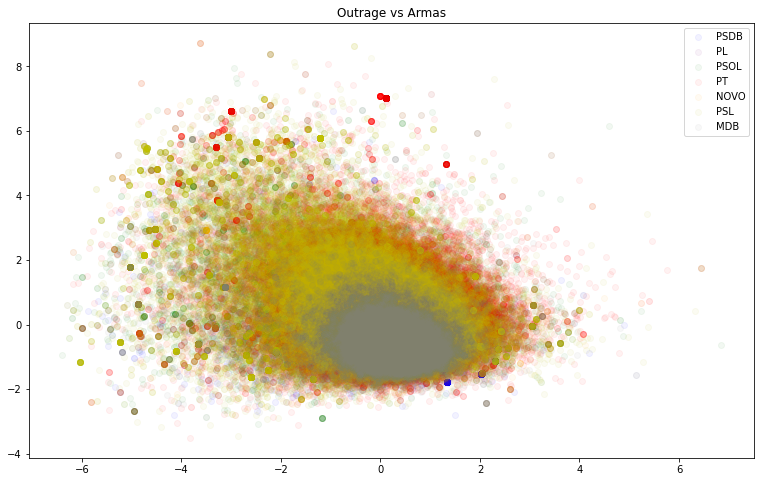

In [81]:
X_2d = df[["armas_auto",'Outrage']].values
y = df['partidos_imp'].values

fig = plt.figure(figsize=(13, 8))

target_ids = range(1,len(partidos)+1)
colors =  'blue','purple','g','red','orange','y','grey'
for i, c, label in zip(target_ids, colors, partidos):
    plt.scatter(X_2d[np.squeeze(y == i), 0], X_2d[np.squeeze(y == i), 1], c=c, label=label, alpha=0.05)
# for word, (x,y) in zip(nomes, X_2d):
#         plt.text(x+0.005, y+0.005, word,fontsize='xx-small')
plt.legend()
plt.title("Outrage vs Armas")
plt.show()
#fig.savefig("tsne_temasss.png")

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [64]:
X_2d

array([[ 1.40387903,  0.27306756],
       [-1.55198669, -0.85906866],
       [-0.92373745, -1.05543694],
       ...,
       [ 1.07822388,  2.25154313],
       [ 2.0687473 ,  2.11107447],
       [ 0.69212339,  0.25937404]])

In [65]:
y

array(['Outros', 'Outros', 'Outros', ..., 'Outros', 'Outros', 'Outros'],
      dtype=object)

In [29]:
def plot_trajectory_week(parlamentar, df = df):
    parl = df[df.partido != 'INFLUENCER']
    parl['date'] = pd.to_datetime(parl['created_at'])
    gr = parl.groupby(pd.Grouper(key='date',freq='W')).agg({'Outrage':'count'})
    gr = gr[['Outrage']].reset_index()
    chart = alt.Chart(gr[gr.date > '2019-01-01']).transform_fold(
        ['Outrage'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        #color='lexicon:N',
        #tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart
plot_trajectory_week('a')

<ipython-input-29-eac3207cba47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parl['date'] = pd.to_datetime(parl['created_at'])


alt.Chart(...)

In [39]:
df

index                   id  id_parlamentar    casa  \
1              1  1357019439326183424          204379  câmara   
2              2  1357018959879536640          204379  câmara   
3              3  1357017482431778818          204379  câmara   
4              4  1350891698851897344          204379  câmara   
5              5  1340807316577333250          204379  câmara   
...          ...                  ...             ...     ...   
1242399  1242399  1224665701497131008               0       -   
1242400  1242400  1224650603512651777               0       -   
1242401  1242401  1224509010839310338               0       -   
1242402  1242402  1224485366595510273               0       -   
1242403  1242403  1224445226065920005               0       -   

          nome_eleitoral     partido  uf       username  created_at  \
1         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
2         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
3         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
4         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-01-17   
5         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2020-12-20   
...                  ...         ...  ..            ...         ...   
1242399  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242400  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242401  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242402  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242403  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-03   

                                                      text  ...  \
1        Estamos na 56° legislatura e pela primeira vez...  ...   
2        Saúdo tbm os eleitos para a Mesa, deputados: A...  ...   
3        Parabenizo e desejo sucesso aos novos presiden...  ...   
4        Notícia tanto aguardada: Duas vacinas aprovada...  ...   
5        Muitos são os desafios. Imensa é nossa luta pa...  ...   
...                                                    ...  ...   
1242399  When Brazilian official agencies use social me...  ...   
1242400  @fiori_anita @petracostal O comentário sexista...  ...   
1242401              @betomiranda @petracostal Exatamente.  ...   
1242402                 @juzinhapersonal @petracostal Não.  ...   
1242403  Depois dessa vou torcer muito por Democracia e...  ...   

         Presupposition  Ambiental   rt_auto   ra_auto   rp_auto armas_auto  \
1              0.932111   0.047014  0.663040  0.500392  0.831275   0.568895   
2             -2.008348  -1.149309  0.429540  0.947992  0.729624  -0.482378   
3             -0.768929  -0.532733  0.807676  1.478826  1.102921   0.375037   
4              0.314928   0.793293 -0.178546 -0.306937  0.066632   0.002258   
5              0.166027   1.363232 -0.068999  0.060989  0.550310   0.083735   
...                 ...        ...       ...       ...       ...        ...   
1242399       -1.712982  -1.450840 -1.985637 -1.905470 -1.420503  -1.566262   
1242400       -0.799476  -1.633531 -1.533527 -2.021905 -1.749596  -2.006979   
1242401        1.378581  -0.648565 -1.782434 -1.995289 -1.677869  -1.803816   
1242402        1.511317  -0.564566 -1.053707 -0.589377 -0.322279   0.159593   
1242403        0.427793  -0.308307 -0.055739 -0.368895  0.001049  -0.101062   

         racismo_auto  len_tweet  tema       date  
1            1.403879         36     0 2021-02-03  
2           -1.551987         37     0 2021-02-03  
3           -0.923737         20     0 2021-02-03  
4            0.139750         36     0 2021-01-17  
5            1.386261         21     0 2020-12-20  
...               ...        ...   ...        ...  
1242399     -1.471327         25     0 2020-02-04  
1242400      1.504078          9     6 2020-02-04  
1242401      1.078224          3     0 2020-02-04  
1242402      2.068747          3     6 2020-02-04  
1242403      0.692123         39     0 2020-02-03  